In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
# !python -m spacy download en_core_web_lg
!python -m spacy link en_core_web_md en
!pip install -U spacy-lookups-data
!python -m spacy download xx_ent_wiki_sm
!pip install -U spacy[cuda92]
!pip install tika
!pip install newspaper3k
!curl https://raw.githubusercontent.com/codelucas/newspaper/master/download_corpora.py | python3
!pip install wordcloud
!pip install textatistic
!pip install langdetect
# !pip install gTTS

### Install tika parser, pandas and modules for files 

In [ ]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
from collections import Counter

from tika import parser # pip install tika
# from gtts import gTTS

import newspaper
from newspaper import Article
from newspaper import Config
import pandas as pd
pd.set_option('display.max_colwidth', 100)

from multiprocessing.dummy import Pool as ThreadPool

import spacy
# Load the small English model – spaCy is already imported
# nlp = spacy.load('en_core_web_sm')
from spacy import displacy
import en_core_web_sm
import en_core_web_md
# import en_core_web_lg
nlp = en_core_web_md.load()
 
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')


from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

# Import the word cloud function
from wordcloud import WordCloud

from textatistic import Textatistic

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Import NLTK Lemmatizer and Stemmer

In [ ]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

### List of urls for download and parsing

In [ ]:
# First minimal list
# raw_urls = """
# https://proglib.io/p/best-format-on-cv/
# https://blog.bitsrc.io/15-app-ideas-to-build-and-level-up-your-coding-skills-28612c72a3b1
# https://proglib.io/p/python-interview/
# https://proglib.io/p/15-questions-for-programmers/
# https://dou.ua/lenta/interviews/first-job-in-sixteen/?from=comment-digest_bc&utm_source=transactional&utm_medium=email&utm_campaign=digest-comments#1829186
# https://medium.com/better-programming/50-python-interview-questions-and-answers-f8e80d031bd3
# https://dev.to/javinpaul/50-data-structure-and-algorithms-problems-from-coding-interviews-4lh2
# https://towardsdatascience.com/53-python-interview-questions-and-answers-91fa311eec3f
# https://interviewing.io/
# https://www.datasciencecentral.com/profiles/blogs/answers-to-dozens-of-data-science-job-interview-questions
# """

# urls_list = raw_urls.split()
# print(urls_list)

# Second maximum list
my_urls = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Awesome Python Learning-Export URLs.csv', index_col=None)
my_url_list = list(my_urls['URL'])
print(my_url_list)

['https://proglib.io/p/best-format-on-cv/', 'https://blog.bitsrc.io/15-app-ideas-to-build-and-level-up-your-coding-skills-28612c72a3b1', 'https://proglib.io/p/python-interview/', 'https://proglib.io/p/15-questions-for-programmers/', 'https://dou.ua/lenta/interviews/first-job-in-sixteen/?from=comment-digest_bc&utm_source=transactional&utm_medium=email&utm_campaign=digest-comments#1829186', 'https://medium.com/better-programming/50-python-interview-questions-and-answers-f8e80d031bd3', 'https://dev.to/javinpaul/50-data-structure-and-algorithms-problems-from-coding-interviews-4lh2', 'https://towardsdatascience.com/53-python-interview-questions-and-answers-91fa311eec3f', 'https://interviewing.io/', 'https://www.datasciencecentral.com/profiles/blogs/answers-to-dozens-of-data-science-job-interview-questions', 'https://coderbyte.com/', 'https://dev.to/', 'https://www.hackerearth.com/for-developers', 'https://kiev.hh.ua/applicant/resumes?from=header_new', 'https://towardsdatascience.com/how-to-

###Text cleaning function

In [ ]:
 def cleaning_raw_text(text_strings):
    safe_text = text_strings.encode('utf-8', errors='ignore')
    safe_text = safe_text.decode('utf-8')
    clean_text = str(safe_text).replace("\nn", "\n")
    clean_text = str(clean_text).replace("\nnn", "\n")
    clean_text = str(clean_text).replace("\n\n\n\n\n", "\n")
    clean_text = str(clean_text).replace("\n\n\n\n", "\n")
    clean_text = str(clean_text).replace("\n\n\n", "\n")
    clean_text = str(clean_text).replace("\n\n", "\n")
    clean_text = str(clean_text).replace("\n\n", "\n")
    clean_text = str(clean_text).replace("-----", "-")
    clean_text = str(clean_text).replace("----", "-")
    clean_text = str(clean_text).replace("---", "-")
    clean_text = ''.join(clean_text.split('\n', 1))
    return clean_text

Parsing URLs (minimum)

## PDF download and parsing

### Current directory path

In [ ]:
path = os.path.abspath(os.curdir)
# path = os.path.abspath('/content/drive/My Drive/Colab Notebooks/Medium/')
path

'/content'

### List of pdf files

In [ ]:
all_files = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith(".pdf")]
all_files

[]

### File sizes

In [ ]:
file_sizes = [os.path.getsize(path + '/' + f) for f in listdir(path) if f.endswith(".pdf")]
file_sizes

[]

### Function for reading pdf files

In [ ]:
 
def read_pdf(filename):
    file = parser.from_file(filename)
 
    return(file)

In [ ]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = user_agent
config.memoize_articles = False
config.fetch_images = False

urls = ['https://proglib.io/p/best-format-on-cv/', 'https://blog.bitsrc.io/15-app-ideas-to-build-and-level-up-your-coding-skills-28612c72a3b1', 'https://proglib.io/p/python-interview/', 'https://proglib.io/p/15-questions-for-programmers/', 'https://dou.ua/lenta/interviews/first-job-in-sixteen/?from=comment-digest_bc&utm_source=transactional&utm_medium=email&utm_campaign=digest-comments#1829186', 'https://medium.com/better-programming/50-python-interview-questions-and-answers-f8e80d031bd3', 'https://dev.to/javinpaul/50-data-structure-and-algorithms-problems-from-coding-interviews-4lh2', 'https://towardsdatascience.com/53-python-interview-questions-and-answers-91fa311eec3f', 'https://interviewing.io/', 'https://www.datasciencecentral.com/profiles/blogs/answers-to-dozens-of-data-science-job-interview-questions']

articles_info_list = []

def getTxt(url):
    try:
        article = Article(url, config=config)
        article.download()
        article.parse()
        article.nlp()

        article_authors = article.authors
        article_title = article.title
        article_text = article.text
        article_summary = article.summary
        article_keywords = article.keywords
        article_movies = article.movies
        article_publish_date = article.publish_date
        article_source_url = article.source_url
        
        url_of_article = article.url
        
        txt = article.text
        txt = cleaning_raw_text(txt)

        tmp = [article_authors, article_title, txt, article_source_url, url_of_article, article_keywords, article_movies,  article_publish_date]            
        articles_info_list.append(tmp)
        
        # return txt

    except:
        print('***FAILED TO DOWNLOAD***', article.url)
    

pool = ThreadPool(4)

# open the urls in their own threads and return the results
%time results = pool.map(getTxt, urls) # insted of my_url_list

# close the pool and wait for the work to finish 
pool.close() 
pool.join()


CPU times: user 2.81 s, sys: 346 ms, total: 3.15 s
Wall time: 3.39 s


In [ ]:
article_info_df = pd.DataFrame(articles_info_list, columns=['article_authors', 'article_title', 'txt', 'article_source_url', 'url_of_article', 'article_keywords', 'article_movies',  'article_publish_date'])
article_info_df.sort_values(by='article_title') 

article_authors  ...             article_publish_date
3          [Florin Pop]  ... 2020-05-19 23:25:27.123000+00:00
2                    []  ...                              NaT
0                    []  ...                              NaT
6                    []  ...                              NaT
1                    []  ...                              NaT
7  [The Educative Team]  ... 2020-06-01 18:45:01.630000+00:00
4                    []  ...                              NaT
8            [Chris I.]  ... 2020-04-27 16:10:45.288000+00:00
9                    []  ...                              NaT
5                    []  ...                              NaT

[10 rows x 8 columns]

In [ ]:
pdf_text_list = []
pagenumbers = []
path_and_files = [path + "/" + f for f in all_files]

def read_pdf_files(path=None):
    if path is not None:
        for i,file in enumerate(path):
            # creating an object
            try:
                text = read_pdf(file)
                pagenumbers.append(text['metadata']['xmpTPg:NPages'])
                t = [[k, v] for k, v in text.items()]
                
                text_strings = str(t[1][1])
                
            except:
                print(f"Something is wrong with reading PDF file #{i}")
                continue
            pdf_text_list.append(cleaning_raw_text(text_strings))


%time read_pdf_files(path=all_files) # instead of path_and_files

pdf_text_list


CPU times: user 41 µs, sys: 12 µs, total: 53 µs
Wall time: 56.7 µs


[]

In [ ]:
import re
all_filenames_without_pdf = []
 
print(all_files)
for filename in all_files:
    # words = filename.split()
    # Create a list of words that are hashtags
    pattern = ".pdf"
    filename = re.sub(pattern, '', filename)
    all_filenames_without_pdf.append(filename)
 
print(all_filenames_without_pdf)

[]
[]


In [ ]:
columns = ['txt']
series = pd.DataFrame(pdf_text_list, index=None, columns=columns)
series['pagenumbers'] = pagenumbers
series['article_title'] = all_filenames_without_pdf
frames = [article_info_df, series]
data = pd.concat(frames)
data


article_authors  ... pagenumbers
0                    []  ...         NaN
1                    []  ...         NaN
2                    []  ...         NaN
3          [Florin Pop]  ...         NaN
4                    []  ...         NaN
5                    []  ...         NaN
6                    []  ...         NaN
7  [The Educative Team]  ...         NaN
8            [Chris I.]  ...         NaN
9                    []  ...         NaN

[10 rows x 9 columns]

In [ ]:
sentence_spans_list = []
for text_article in data['txt']:
    doc = nlp(text_article)
    sentence_spans = doc.sents
    sentence_spans_list.append(list(sentence_spans))

data['sentence_spans'] = sentence_spans_list
data.sentence_spans

0    [(В, этой, статье, я, расскажу), (о, задачах), (и, вопросах, ,, которые, ждут, программистов, на...
1    [(Как, лучший, продукт, ,, который, делает, свою, работу, ,, лучшие, резюме), (—, это, то, ,, чт...
2    [(Готовитесь, к, собеседованию), (на, позицию, Python, -, джуниора, ?), (Подборка, важных, вопро...
3    [(15, App, Ideas, to, Build, and, Level, Up, your, Coding, SkillsApp, ideas, that, are, great, t...
4    [(Disclosure, :, This, post, includes, affiliate, links, ;, I, may, receive, compensation, if, y...
5    [(Technical, interviewing, and, looking, for, a, job, are, annoying, .), (We, make, both, less, ...
6    [(16-річний, програміст, із), (Черкащини), (—, про, те, ,, як, 11-класником), (влаштувався, на, ...
7    [(Python, Interview, Questions, —, Language, specificQuestion, 1, :, What, is, the, difference, ...
8    [(1, .), (What, is, the, difference, between, a, list, and, a), (tuple?I’ve, been, asked, this, ...
9    [(We, just, started, in, this, article, to, provid

###Replace text with regexp

In [ ]:
import re
 
cleaned_text_list = []
 
for article_df in  data.txt:
    clean_endlines = re.sub("\.\n", '.+++', article_df)
    clean_endlines = re.sub("!\n", '!+++', clean_endlines)
    clean_endlines = re.sub(":\n", '+++', clean_endlines)
    clean_endlines = re.sub("\n", ' ', clean_endlines)
    # pattern = "+++"
    # clean_endlines = re.sub(pattern, '\n', clean_endlines)
    enter_endlines = re.sub("\+{3}", "\n", clean_endlines)
    
 
    # Replace more then two links one after the other
    pattern = "[http]\S+\s[http]\S+\s[http]\S+"
    clean_two_http_links = re.sub(pattern, '', enter_endlines)
    # print(clean_two_http_links)
 
    # pattern = "\d{1,2}\/\d{1,2}"
    # clean_pagenumbers = re.sub(pattern, '', data.body_text[0])
    # Replace all numbers of pages and http in the headers
    # pattern = "[http]\S+\s\d{1,2}\/\d{1,2}"
    # clean_http_and_pagenumbers = re.sub(pattern, '', clean_two_http_links)
    # print(clean_http_and_pagenumbers)
 
    # Clean dates in headers
    # pattern = "\d{1,2}\.\d{2}\.\d{4}"
    pattern = "(\d{1,2}\.\d{2}\.\d{4})(.)+(\d{1,2}\/\d{1,2})"
    clean_http_and_pagenumbers = re.sub(pattern, '', clean_two_http_links)
    cleaned_text_list.append(clean_http_and_pagenumbers)
    
data["cleaned_body_text"] = cleaned_text_list
data

article_authors  ...                                                                                    cleaned_body_text
0                    []  ...  В этой статье я расскажу о задачах и вопросах, которые ждут программистов на собеседовании при п...
1                    []  ...  Как лучший продукт, который делает свою работу, лучшие резюме — это то, что позволяют узнать о в...
2                    []  ...  Готовитесь к собеседованию на позицию Python-джуниора? Подборка важных вопросов по Python с объя...
3          [Florin Pop]  ...  15 App Ideas to Build and Level Up your Coding SkillsApp ideas that are great to improve your co...
4                    []  ...  Disclosure: This post includes affiliate links; I may receive compensation if you purchase produ...
5                    []  ...  Technical interviewing and looking for a job are annoying. We make both less terrible. Here’s ho...
6                    []  ...  16-річний програміст із Черкащини — про те, як 11-класником влаштувався на роботу зі зарплатнею ...
7  [The Educative Team]  ...  Python Interview Questions — Language specificQuestion 1: What is the difference between a list ...
8            [Chris I.]  ...  1. What is the difference between a list and a tuple?I’ve been asked this question in every pyth...
9                    []  ...  We just started in this ar answers to one of the largest collection of data science job intervie...

[10 rows x 11 columns]

###Read in text

In [ ]:
# Delete first symbol \n in the string
data.txt[0]
data.txt[0] = ''.join(str(data.txt[0]).split('\n', 1))
data.txt[0]
data

In [ ]:
from langdetect import detect_langs
languages = []

# Loop over the rows of the dataset and append
for row in data.cleaned_body_text:
    languages.append(detect_langs(row))

# Clean the list by splitting
languages = [str(lang).split(':')[0][1:] for lang in languages]

# # Assign the list to a new feature
data['language'] = languages

print(data)

        article_authors  ... language
0                    []  ...       ru
1                    []  ...       ru
2                    []  ...       ru
3          [Florin Pop]  ...       en
4                    []  ...       en
5                    []  ...       en
6                    []  ...       uk
7  [The Educative Team]  ...       en
8            [Chris I.]  ...       en
9                    []  ...       en

[10 rows x 12 columns]


###NLTK preprocessing, cleaning text, stemming, lemmatizing

In [ ]:
import re
import string

 
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text
 
data['body_text_nostop'] = data["cleaned_body_text"].apply(lambda x: clean_text(x.lower()))

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text
 
data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))
 
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text
 
data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))
 
data.head(10)

article_authors  ... mention_count
0                    []  ...             0
1                    []  ...             0
2                    []  ...             6
3          [Florin Pop]  ...             0
4                    []  ...             0
5                    []  ...             0
6                    []  ...             0
7  [The Educative Team]  ...             3
8            [Chris I.]  ...             6
9                    []  ...             2

[10 rows x 30 columns]

### Most common words

In [ ]:
most_common_list = []
for data_row in data['body_text_lemmatized']:
    # Create the bag-of-words: bow
    bow = Counter(data_row)
    word_bow = [word for word,cnt in bow.most_common(10)]
    # Print the 10 most common tokens
    most_common_list.append(word_bow)

data['most_common_words'] = most_common_list
data.head()

article_authors  ... mention_count
0              []  ...             0
1              []  ...             0
2              []  ...             6
3    [Florin Pop]  ...             0
4              []  ...             0

[5 rows x 30 columns]

In [ ]:
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   article_authors       10 non-null     object                   
 1   article_title         10 non-null     object                   
 2   txt                   10 non-null     object                   
 3   article_source_url    10 non-null     object                   
 4   url_of_article        10 non-null     object                   
 5   article_keywords      10 non-null     object                   
 6   article_movies        10 non-null     object                   
 7   article_publish_date  3 non-null      datetime64[ns, tzlocal()]
 8   pagenumbers           0 non-null      float64                  
 9   sentence_spans        10 non-null     object                   
 10  cleaned_body_text     10 non-null     object                   
 

(10, 16)

### Remove long words

In [ ]:
def length(column):
    text = [item for item in column if len(item) < 14]
    # [item for row in column for item in row if len(item) > 14]
    return text
 
data['body_textlemm_nolongwords'] = data['body_text_lemmatized'].apply(lambda x: length(x))


###Create feature for:
 . Create feature for  

*   text message length
*   % of text that is punctuation
*   non stop words



In [ ]:
data['body_len'] = data["txt"].apply(lambda x: len(x) - x.count(" "))
data['cleaned_body_len'] = data["cleaned_body_text"].apply(lambda x: len(x) - x.count(" "))
 
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    try:
        return round(count/(len(text) - text.count(" ")), 3)*100
    except:
        pass


# Create a feature char_count
data['cleaned_char_count'] = data["cleaned_body_text"].apply(len)

# Function that returns number of words in a string
def count_words(string):
    # Split the string into words
    words = string.split()
 
    # Return the number of words
    return len(words)
  
# Create a new feature word_count
data['word_count'] = data["cleaned_body_text"].apply(count_words)
 
data['cleaned_body_punct%'] = data["cleaned_body_text"].apply(lambda x: count_punct(x))
data['body_nonstop_len'] = data["body_text_nostop"].apply(lambda x: len(x) - x.count(" "))
data['body_stemm_len'] = data["body_text_stemmed"].apply(lambda x: len(x) - x.count(" "))
data['body_lemm_len'] = data["body_text_lemmatized"].apply(lambda x: len(x) - x.count(" "))
data['body_textlemm_nolongwords_len'] = data['body_textlemm_nolongwords'].apply(lambda x: len(x) - x.count(" "))
 
# length_words = data.body_textlemm_nolongwords.str.len()
# data['body_textlemm_nolongwords_len1'] = length_words


data

article_authors  ... mention_count
0                    []  ...             0
1                    []  ...             0
2                    []  ...             6
3          [Florin Pop]  ...             0
4                    []  ...             0
5                    []  ...             0
6                    []  ...             0
7  [The Educative Team]  ...             3
8            [Chris I.]  ...             6
9                    []  ...             2

[10 rows x 30 columns]

In [ ]:
# Import the needed packages


# Tokenize each item in the review column 
word_tokens = [word_tokenize(review) for review in data.cleaned_body_text]

# Print out the first item of the word_tokens list
print(word_tokens[0])

# Create an empty list to store the length of reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
data['n_tokens'] = len_tokens
data['n_tokens']

['В', 'этой', 'статье', 'я', 'расскажу', 'о', 'задачах', 'и', 'вопросах', ',', 'которые', 'ждут', 'программистов', 'на', 'собеседовании', 'при', 'приёме', 'на', 'работу.Интервьюеры', 'не', 'отличаются', 'оригинальностью', ',', 'и', 'один', 'и', 'тот', 'же', 'вопрос', 'можно', 'встретить', 'на', '3-5', 'разных', 'собеседованиях', '.', 'Но', 'даже', 'опытные', 'программисты', ',', 'оказываясь', 'в', 'стрессовой', 'ситуации', ',', 'нередко', 'теряются', 'и', 'не', 'могут', 'найти', 'ответ', 'на', 'довольно', 'простые', 'вопросы', '.', 'Предлагаем', 'заранее', 'потренироваться', ',', 'проверить', 'свои', 'знания', ',', 'а', 'заодно', 'посмотреть', 'на', 'любимые', 'вопросы', 'интервьюеров', '.', 'Не', 'исключено', ',', 'что', 'именно', 'на', 'них', 'вам', 'предстоит', 'отвечать', 'на', 'следующем', 'собеседовании', '.', 'Структуры', 'данных', 'и', 'вопросы', 'об', 'алгоритмах', '–', 'основная', 'часть', 'любого', 'собеседования', 'для', 'программистов', 'вне', 'зависимости', 'от', 'их', 'с

0    2578
1     541
2    3379
3    4841
4    2797
5      43
6    2666
7    4797
8    5664
9    3743
Name: n_tokens, dtype: int64

In [ ]:
data['body_len'] = data['body_len'].dropna()
data

article_authors  ... mention_count
0                    []  ...             0
1                    []  ...             0
2                    []  ...             6
3          [Florin Pop]  ...             0
4                    []  ...             0
5                    []  ...             0
6                    []  ...             0
7  [The Educative Team]  ...             3
8            [Chris I.]  ...             6
9                    []  ...             2

[10 rows x 30 columns]

In [ ]:
# Drop all rows that are missing 'driver_gender'
data.dropna(subset=['body_len'], inplace=True)

# Count the number of missing values in each column (again)
print(data.isnull().sum())

# Examine the shape of the DataFrame
print(data.shape)

article_authors                   0
article_title                     0
txt                               0
article_source_url                0
url_of_article                    0
article_keywords                  0
article_movies                    0
article_publish_date              7
pagenumbers                      10
sentence_spans                    0
cleaned_body_text                 0
language                          0
body_text_nostop                  0
body_text_stemmed                 0
body_text_lemmatized              0
most_common_words                 0
body_textlemm_nolongwords         0
body_len                          0
cleaned_body_len                  0
char_count                        0
word_count                        0
cleaned_body_punct%               0
body_nonstop_len                  0
body_stemm_len                    0
body_lemm_len                     0
body_textlemm_nolongwords_len     0
cleaned_char_count                0
n_tokens                    

In [ ]:
data

article_authors  ... mention_count
0                    []  ...             0
1                    []  ...             0
2                    []  ...             6
3          [Florin Pop]  ...             0
4                    []  ...             0
5                    []  ...             0
6                    []  ...             0
7  [The Educative Team]  ...             3
8            [Chris I.]  ...             6
9                    []  ...             2

[10 rows x 30 columns]

###Plot the two new features

In [ ]:
data.columns

Index(['article_authors', 'article_title', 'txt', 'article_source_url',
       'url_of_article', 'article_keywords', 'article_movies',
       'article_publish_date', 'pagenumbers', 'sentence_spans',
       'cleaned_body_text', 'language', 'body_text_nostop',
       'body_text_stemmed', 'body_text_lemmatized', 'most_common_words',
       'body_textlemm_nolongwords', 'body_len', 'cleaned_body_len',
       'char_count', 'word_count', 'cleaned_body_punct%', 'body_nonstop_len',
       'body_stemm_len', 'body_lemm_len', 'body_textlemm_nolongwords_len',
       'cleaned_char_count', 'n_tokens', 'http_count', 'mention_count'],
      dtype='object')

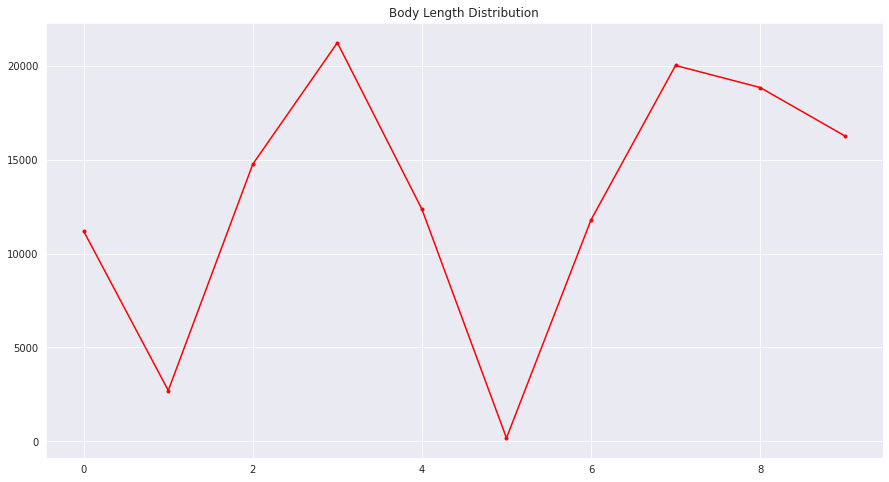

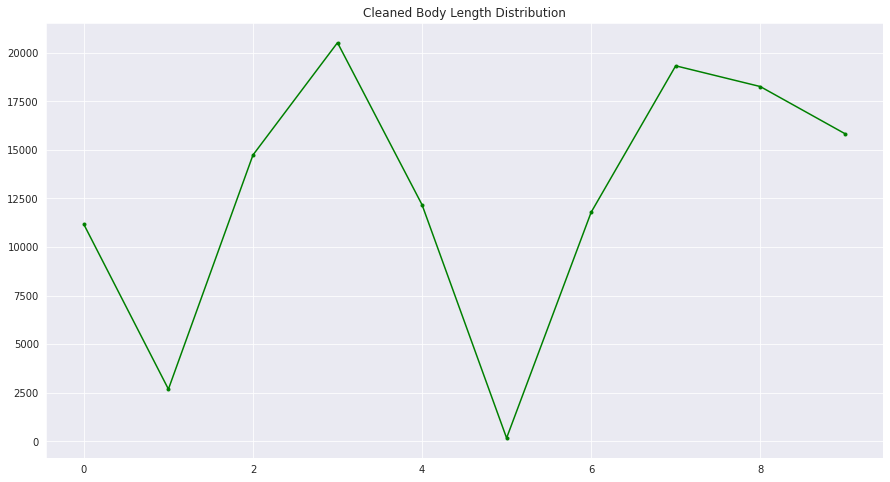

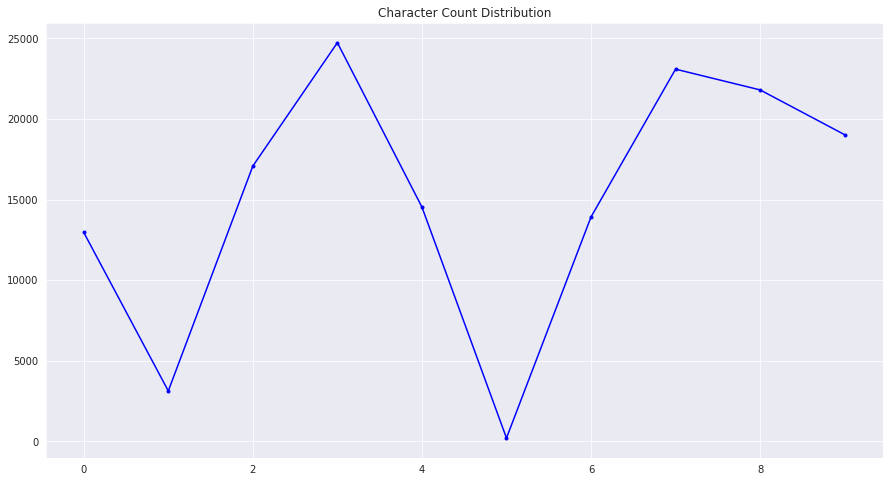

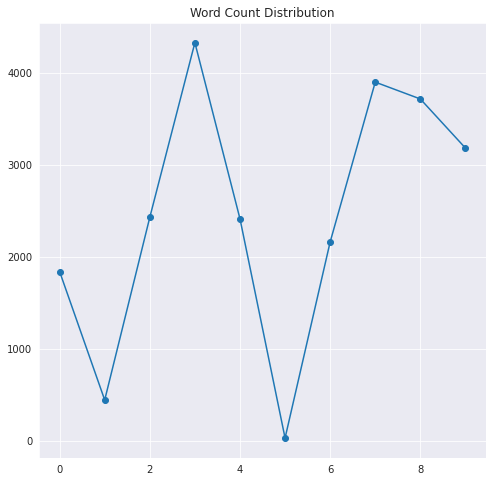

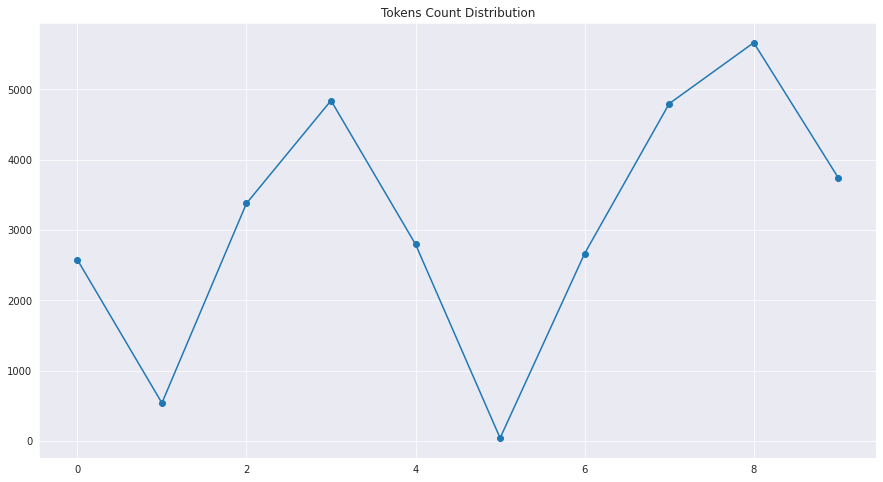

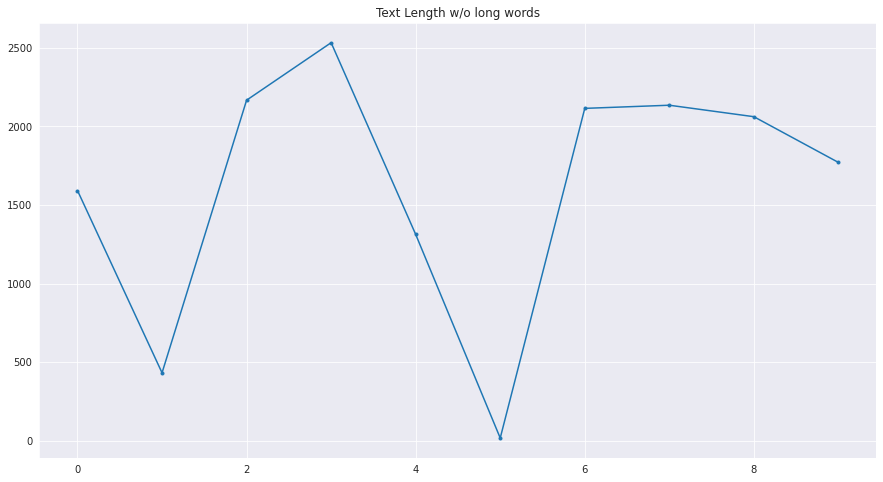

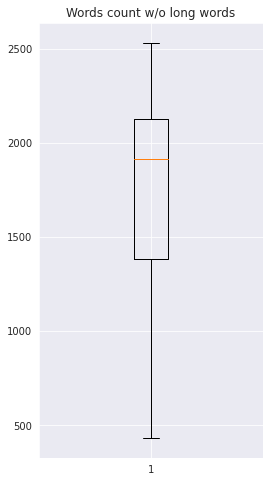

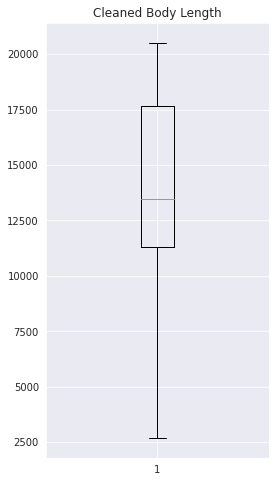

In [ ]:
# fig, axs = plt.subplots(2, 2 ,gridspec_kw={'hspace': 0.5, 'wspace': 0.4})
# Create a Figure and an Axes with plt.subplots
fig = plt.figure(figsize=(15,8))

plt.plot(data['body_len'], color='r',  marker='.', label = 'body_len')
plt.title("Body Length Distribution")
plt.grid(True)
plt.show()
fig.set_size_inches([18, 10])
fig.savefig('figure_1.png')
fig = plt.figure(figsize=(15,8))
plt.plot(data['cleaned_body_len'], color='g', marker='.', label = 'cleaned_body_len')
plt.title("Cleaned Body Length Distribution")
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(15,8))
plt.plot(data['cleaned_char_count'], color='b', marker='.', label = 'cleaned_char_count')
plt.title("Character Count Distribution")
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(data['word_count'], marker='o', label = 'word_count')
plt.title("Word Count Distribution")
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(15,8))
plt.plot(data['n_tokens'], marker='o', label = 'n_tokens')
plt.title("Tokens Count Distribution")
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(15,8))
# ax2.plot(data['body_lemm_len'], marker='v', label = 'body_lemm_len')
plt.plot(data['body_textlemm_nolongwords_len'], marker='.', label = 'textlemm_nolongwords_len')
plt.title("Text Length w/o long words")
plt.grid(True)
plt.show()


# plt.scatter(data['word_count'], data['body_textlemm_nolongwords_len'])
# plt.show()
fig = plt.figure(figsize=(4,8))

plt.boxplot(data['body_textlemm_nolongwords_len'], showfliers=False)
plt.title("Words count w/o long words")
plt.show()
fig.set_size_inches([18, 10])
fig.savefig('figure_2.png')

fig = plt.figure(figsize=(4,8))

plt.boxplot(data['cleaned_body_len'], showfliers=False)
plt.title("Cleaned Body Length")
plt.show()
fig.set_size_inches([18, 10])
fig.savefig('figure_3.png')


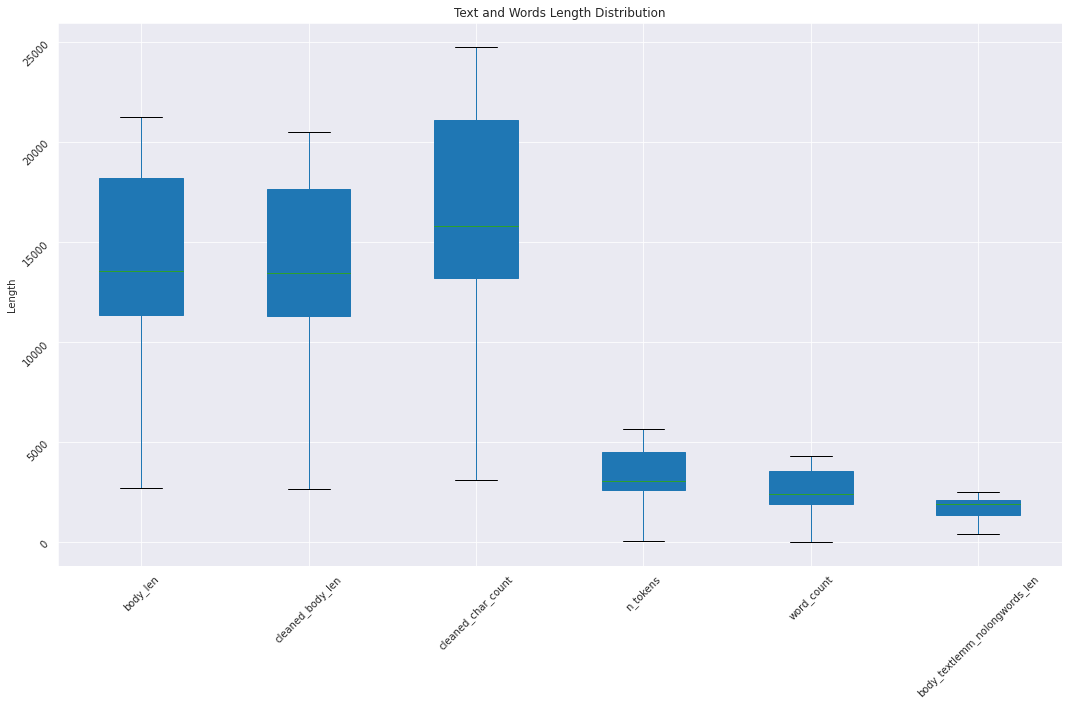

In [ ]:
def boxplot_default():
    
    fig = plt.figure(figsize=(15,8))
    
    body_length = data[['body_len','cleaned_body_len', 'cleaned_char_count', 'n_tokens', 'word_count', 'body_textlemm_nolongwords_len']]
    body_length.boxplot(showfliers=False, patch_artist=True)
    
    plt.ylabel('Length')
    plt.title('Text and Words Length Distribution')
    plt.tick_params(labelrotation = 45)
    fig.set_size_inches([18, 10])
    fig.savefig('figure_4.png')
    plt.show()
    

boxplot_default()

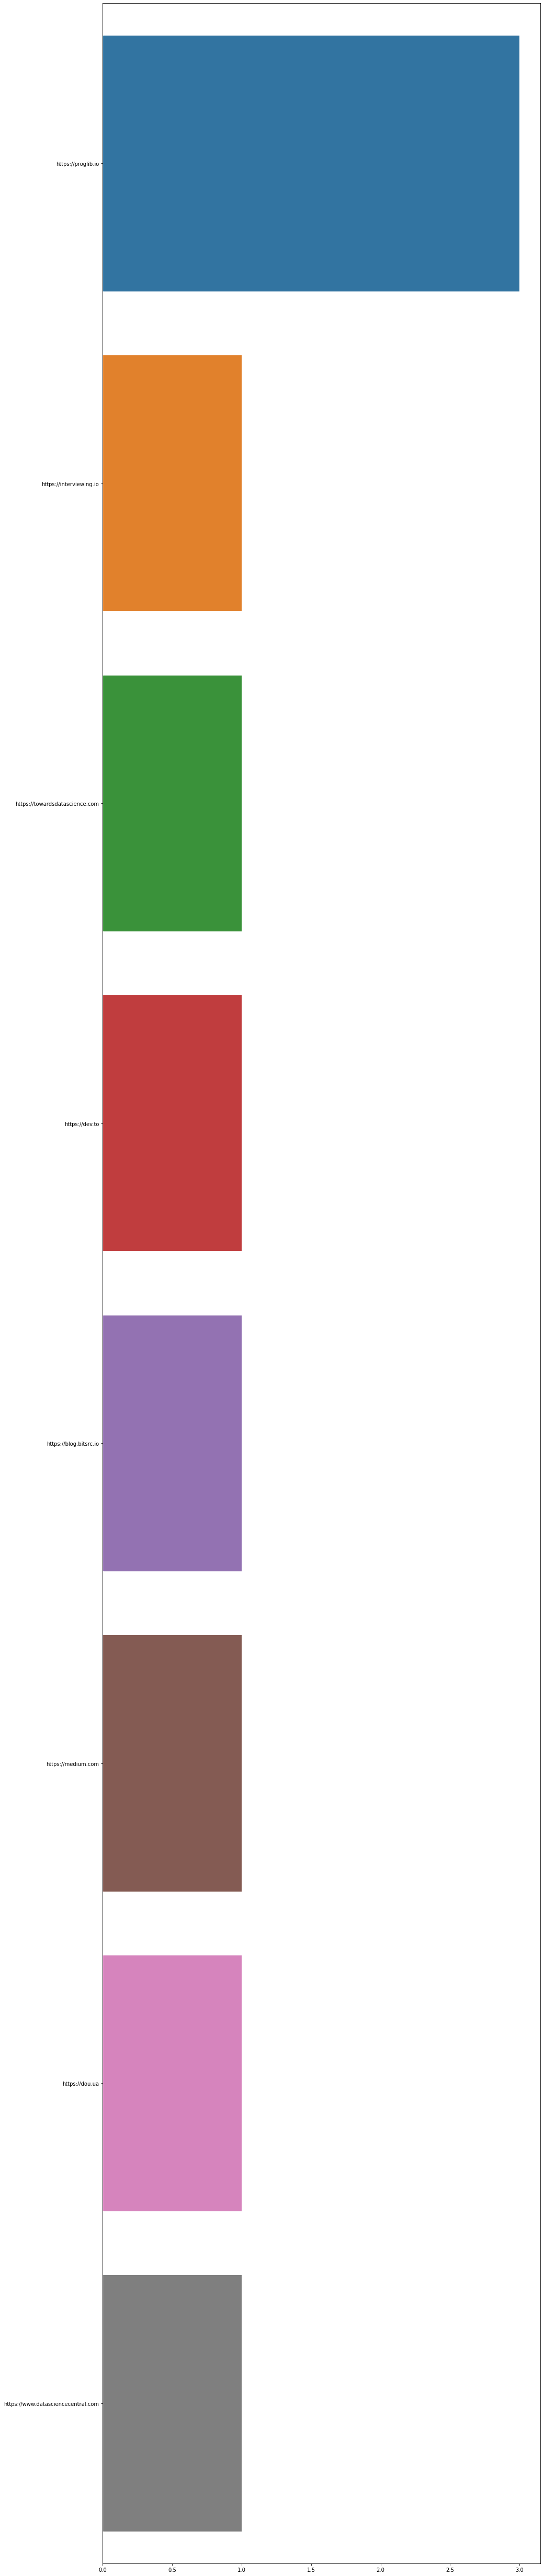

In [ ]:
fig, ax = plt.subplots(figsize=(15,90))
a= data['article_source_url'].value_counts()
species = a.index
count = a.values
sns.barplot(y = species, x=count, label = 'value_counts')
plt.show()
fig.set_size_inches([18, 100])
fig.savefig('figure_5.png')

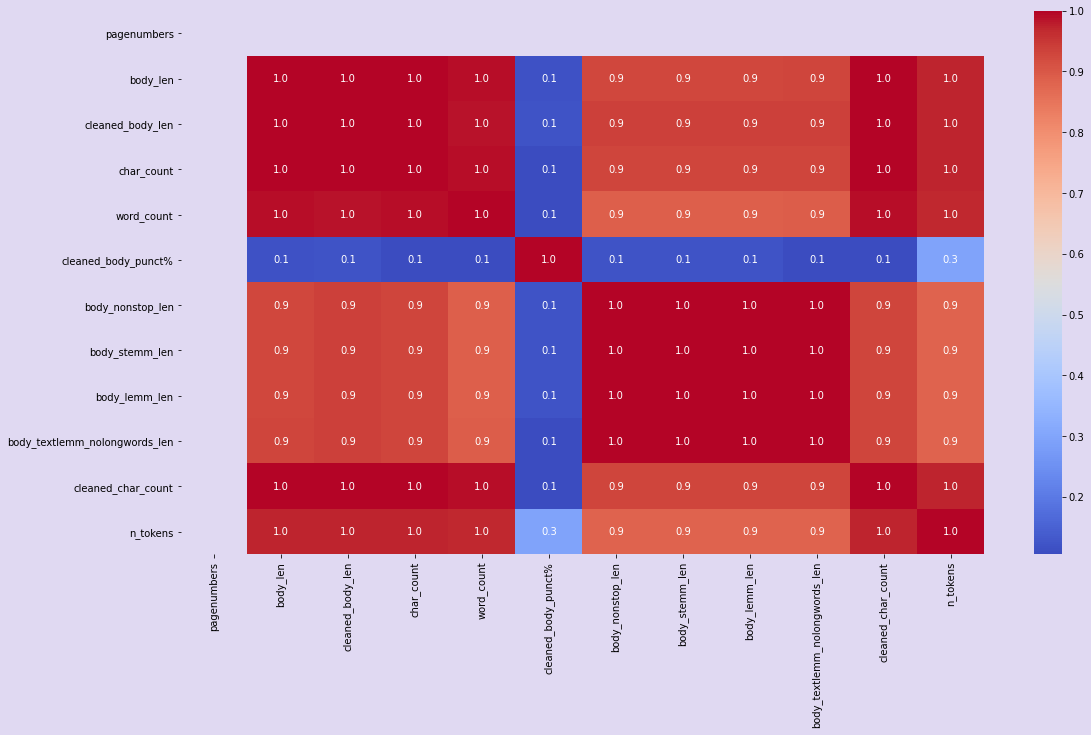

In [ ]:
bg_color = (0.88,0.85,0.95)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color
fig, ax = plt.subplots(1, figsize=(20,15))

sns.heatmap(data.corr(), ax=ax, cmap='coolwarm',  robust=True, annot=True, fmt=".1f")
fig.set_size_inches([18, 10])
fig.savefig('figure_6.png')
plt.show()

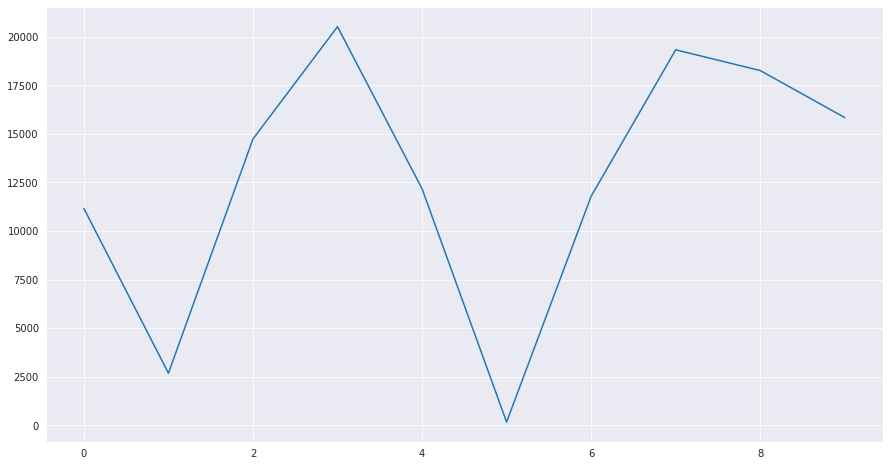

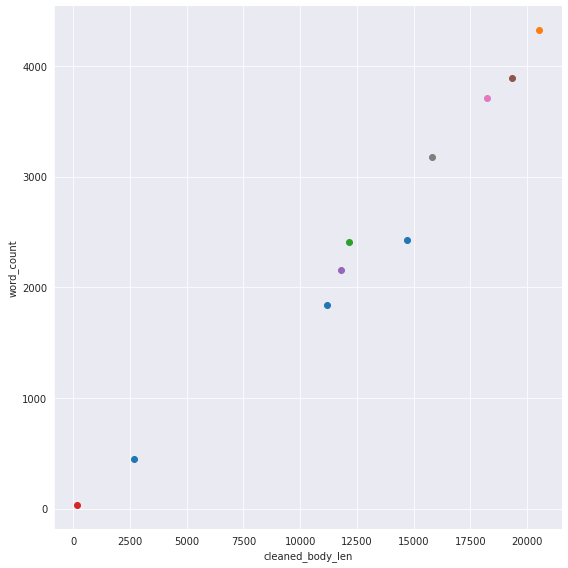

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=data.cleaned_body_len)
plt.show()


sns.FacetGrid(data, hue="article_source_url", height=8).map(plt.scatter, 'cleaned_body_len', "word_count")
plt.show()
fig.set_size_inches([18, 10])
fig.savefig('figure_7.png')


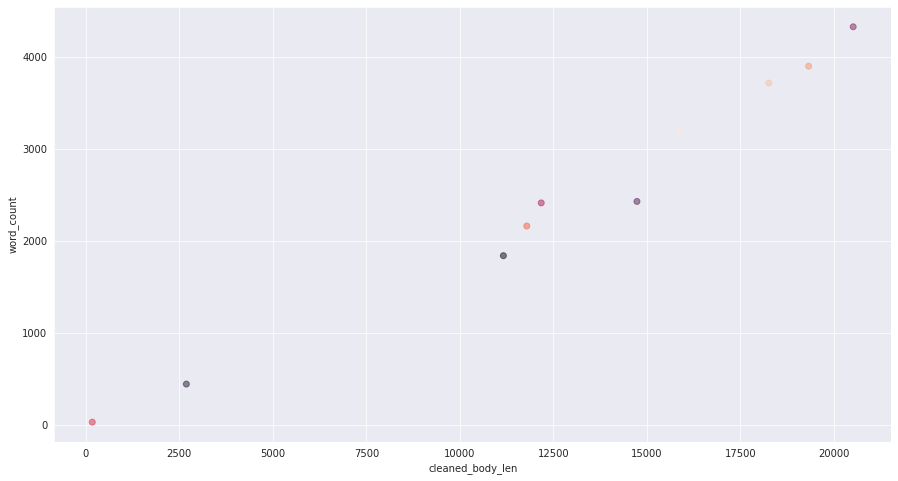

<Figure size 432x288 with 0 Axes>

In [ ]:
# plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,8))

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(x=data['cleaned_body_len'], y=data['word_count'], c=data.index, alpha=0.5)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("cleaned_body_len")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("word_count")

plt.show()
fig.set_size_inches([18, 10])
plt.savefig('figure_8.png')

---------------------------------


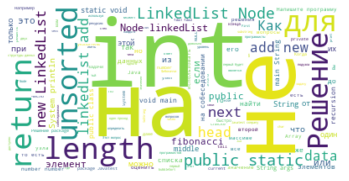

---------------------------------


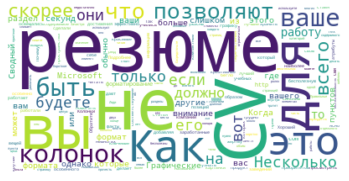

---------------------------------


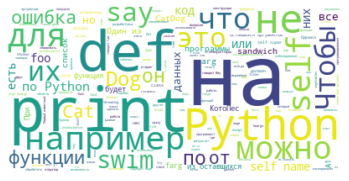

---------------------------------


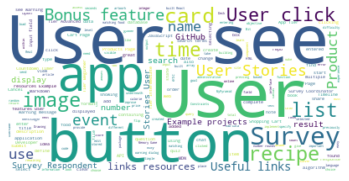

---------------------------------


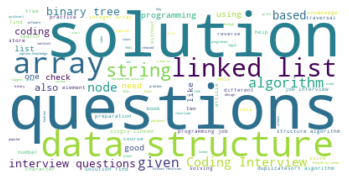

---------------------------------


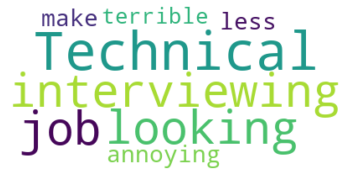

---------------------------------


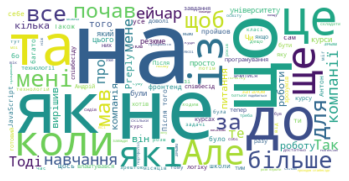

---------------------------------


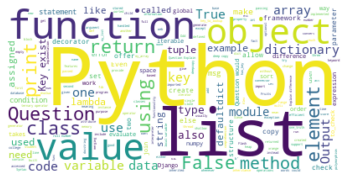

---------------------------------


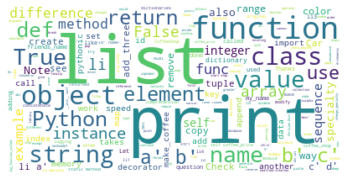

---------------------------------


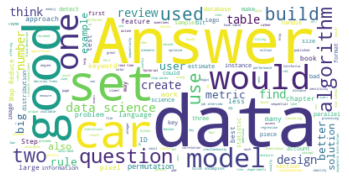

In [ ]:
for i, s in enumerate(data['cleaned_body_text']):
    # Create and generate a word cloud image
    my_cloud = WordCloud(background_color='white', stopwords=stopwords).generate(str(s))
 
    # Display the generated wordcloud image
    plt.imshow(my_cloud, interpolation='bilinear')
    plt.axis("off")
 
    # Don't forget to show the final image
    print('---------------------------------')
    fig.set_size_inches([18, 10])
    plt.savefig(f'wordcloud/wordcloud_{i}.png')
    plt.show()

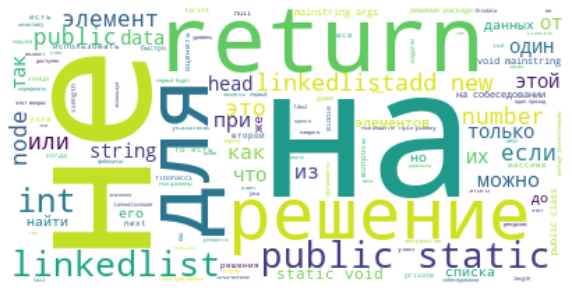

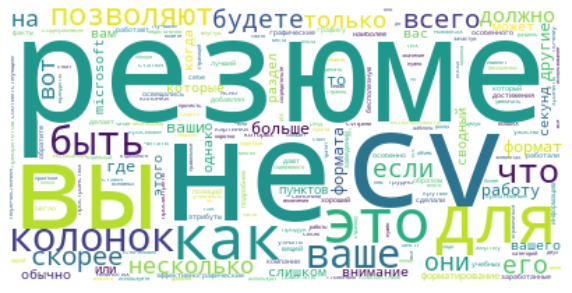

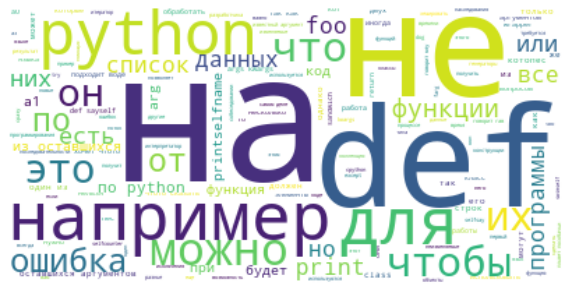

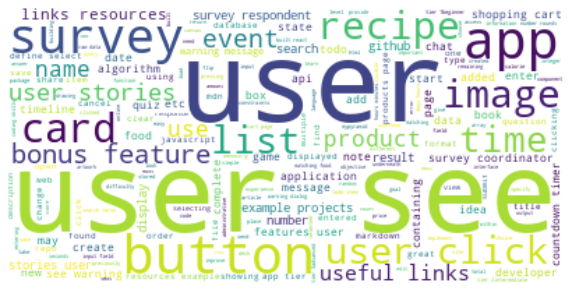

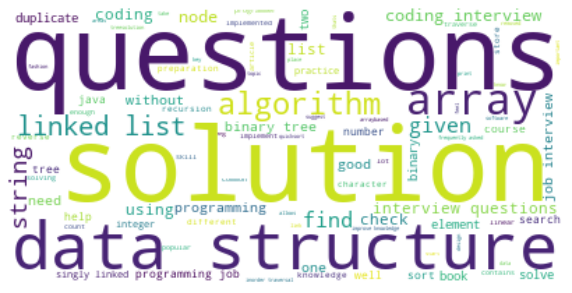

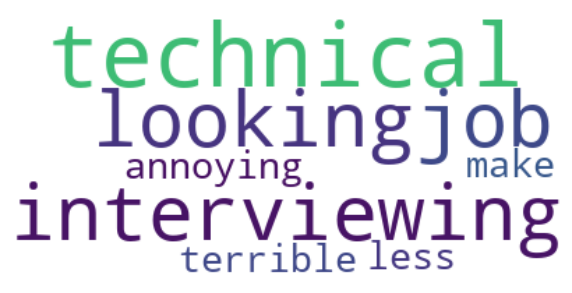

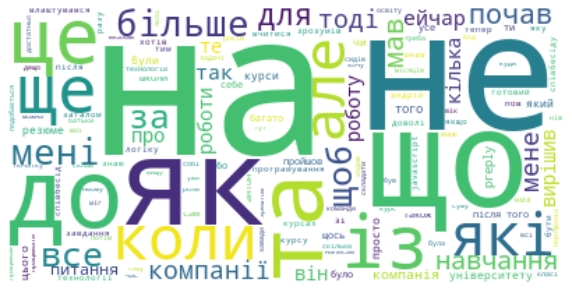

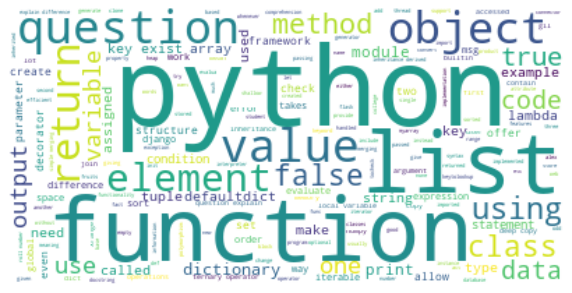

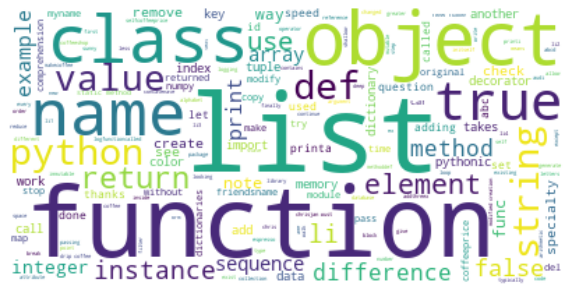

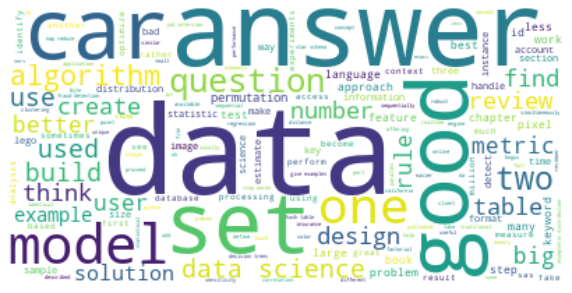

In [ ]:
for s in data['body_text_nostop']:
    ss = ' '.join(s)
    my_cloud = WordCloud(background_color='white').generate(str(ss))
    fig, ax = plt.subplots(figsize=(10,6))
    plt.imshow(my_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

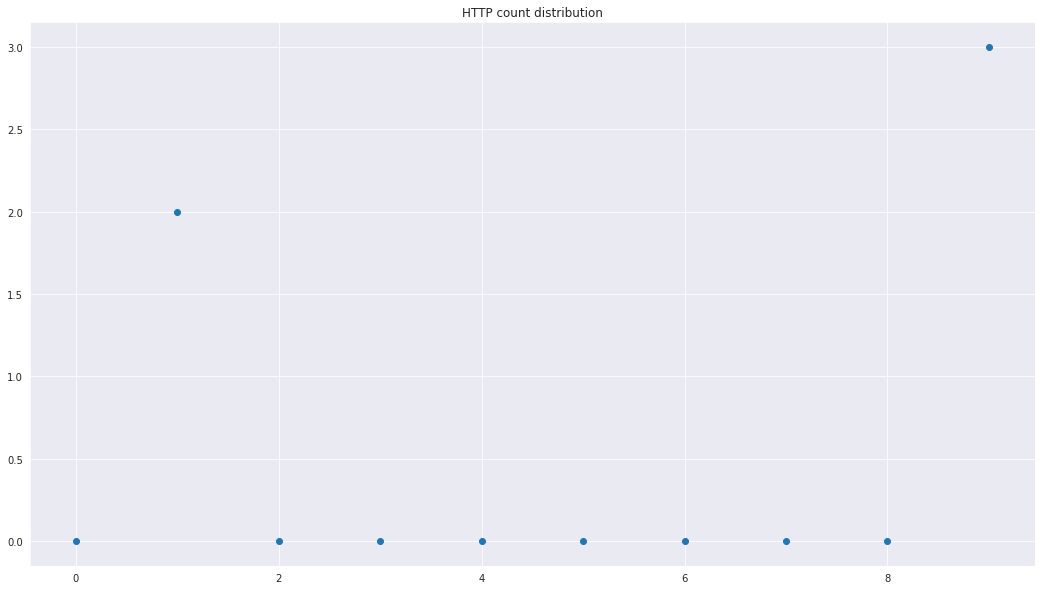

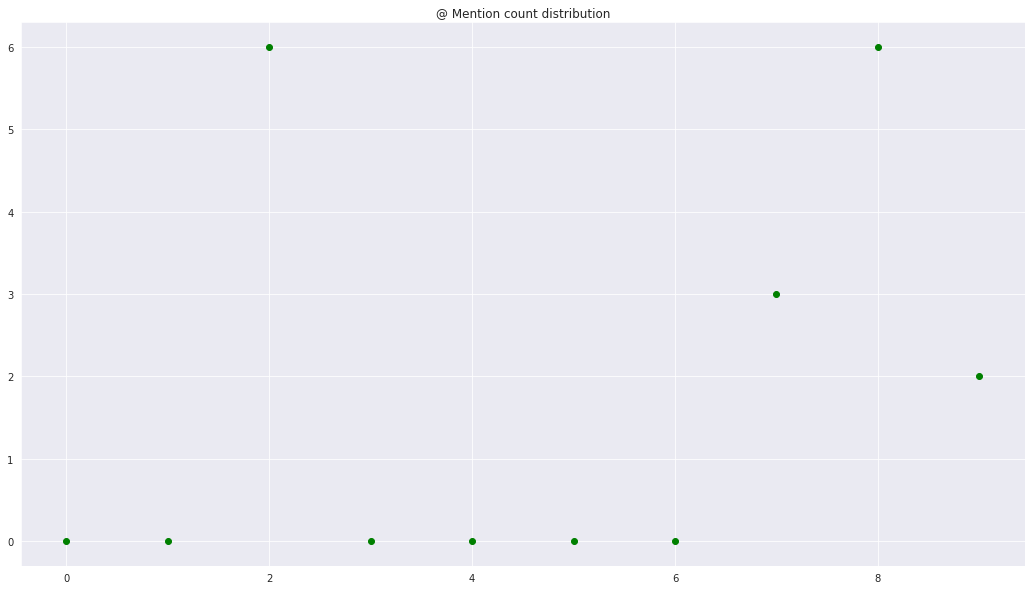

In [ ]:
# Function that returns numner of hashtags in a string
def count_https(string):
    # Split the string into words
    words = string.split()
 
    # Create a list of words that are hashtags
    https = [word for word in words if word.startswith('http')]
 
    # Return number of hashtags
    return (len(https))
 
 
# Create a feature hashtag_count and display distribution
data['http_count'] = data["cleaned_body_text"].apply(count_https)
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(data.index, data['http_count'])
plt.title('HTTP count distribution')
fig.set_size_inches([18, 10])
fig.savefig('figure_9.png')
plt.show()
 
 
# Function that returns number of mentions in a string
def count_mentions(string):
    # Split the string into words
    words = string.split()
 
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
 
    # Return number of mentions
    return (len(mentions))
 
 
# Create a feature mention_count and display distribution
data['mention_count'] = data["cleaned_body_text"].apply(count_mentions)
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(data.index, data['mention_count'], color='green')
plt.title('@ Mention count distribution')
fig.set_size_inches([18, 10])
fig.savefig('figure_10.png')
plt.show()
# data['mention_count']

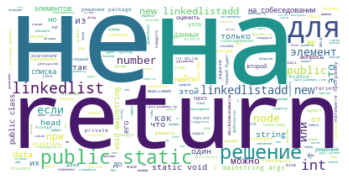

---------------------------------


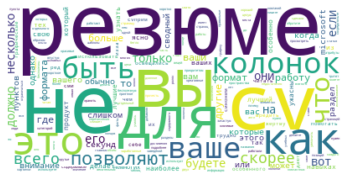

---------------------------------


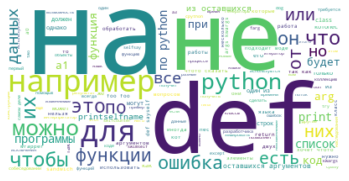

---------------------------------


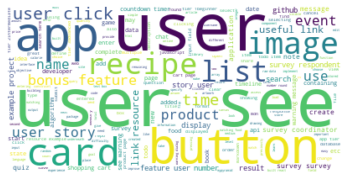

---------------------------------


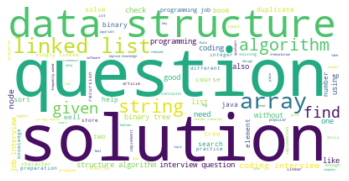

---------------------------------


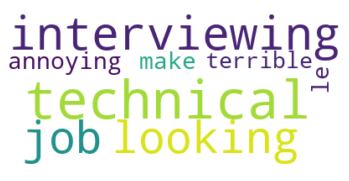

---------------------------------


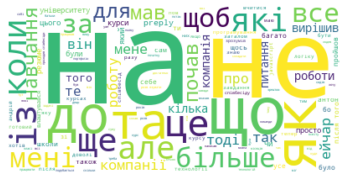

---------------------------------


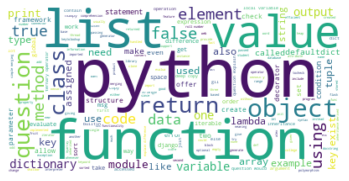

---------------------------------


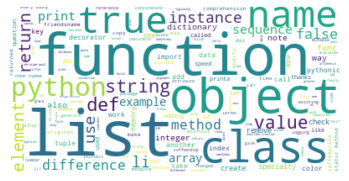

---------------------------------


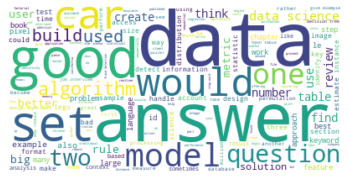

---------------------------------


In [ ]:
for s in data.body_textlemm_nolongwords:
    # Create and generate a word cloud image
    ss = ' '.join(s)
    my_cloud = WordCloud(background_color='white', stopwords=stopwords).generate(str(ss))
 
    # Display the generated wordcloud image
    plt.imshow(my_cloud, interpolation='bilinear')
    plt.axis("off")
 
    # Don't forget to show the final image
    plt.show()
    print('---------------------------------')

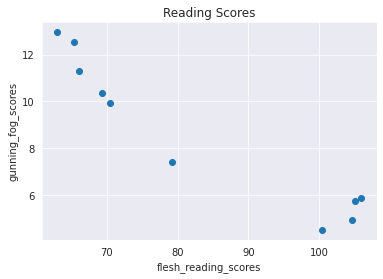

In [ ]:
# Import Textatistic

flesh_reading_scores = []
gunning_fog_scores = []
 
for article in data["cleaned_body_text"]:
    # Compute the readability scores
    try:
        readability_scores = Textatistic(article).scores
        flesch = readability_scores['flesch_score']
        gunning_fog = readability_scores['gunningfog_score']
    except:
        print('Error has occured')
        continue
    
    flesh_reading_scores.append(flesch)
    gunning_fog_scores.append(gunning_fog)

data["flesh_reading_scores"] = pd.Series(flesh_reading_scores)
 
# Loop through excerpts and compute gunning fog index

data["gunning_fog_scores"] = pd.Series(gunning_fog_scores)

plt.scatter(data["flesh_reading_scores"], data["gunning_fog_scores"])
plt.title('Reading Scores')
plt.xlabel('flesh_reading_scores')
plt.ylabel('gunning_fog_scores')
plt.show()

In [ ]:
proper_nouns_count = []
nouns_count = []
find_persons_list = []
for i, art1 in enumerate(data.cleaned_body_text):
    # Returns number of proper nouns
    def proper_nouns(text, model=nlp):
        # Create doc object
        doc = model(text)
        # Generate list of POS tags
        pos = [token.pos_ for token in doc]
    
        # Return number of proper nouns
        return pos.count('PROPN')
    proper_nouns_count.append(proper_nouns(art1, nlp))

    # Returns number of other nouns
    def nouns(text, model=nlp):
        # Create doc object
        doc = model(text)
        # Generate list of POS tags
        pos = [token.pos_ for token in doc]
    
        # Return number of other nouns
        return pos.count('NOUN')
    
    
    nouns_count.append(nouns(art1, nlp))



data['proper_nouns_count'] = proper_nouns_count
data['nouns_count'] = nouns_count

data

article_authors  ... nouns_count
0                    []  ...         291
1                    []  ...          49
2                    []  ...         354
3          [Florin Pop]  ...        1244
4                    []  ...         662
5                    []  ...           4
6                    []  ...         202
7  [The Educative Team]  ...        1073
8            [Chris I.]  ...        1054
9                    []  ...         865

[10 rows x 34 columns]

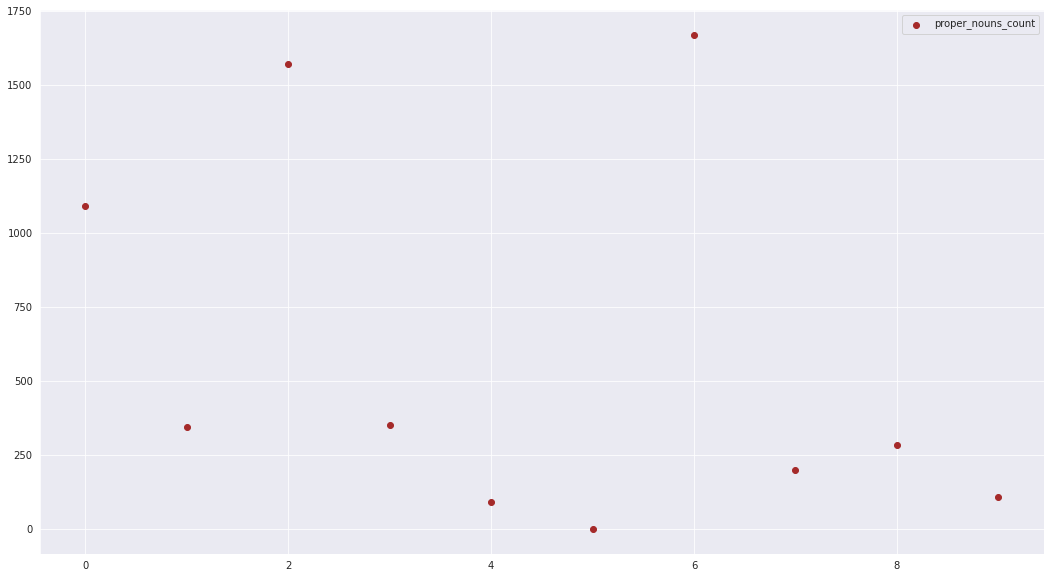

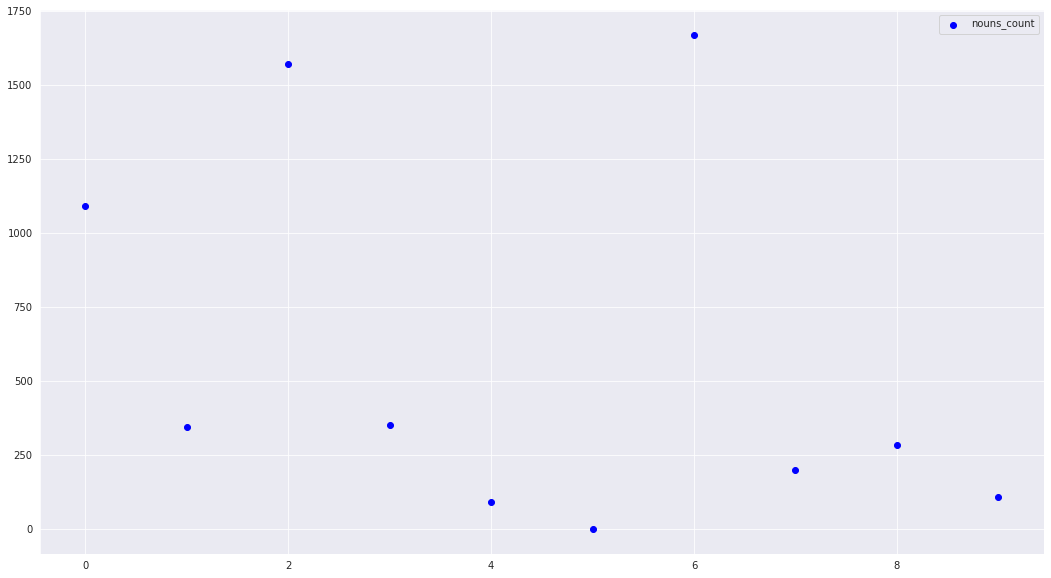

In [292]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(data.index, data['proper_nouns_count'], label='proper_nouns_count',color='brown')
plt.legend()
fig.set_size_inches([18, 10])
fig.savefig('figure_10.png')
plt.show()

fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(data.index, data['proper_nouns_count'], label='nouns_count', color='blue')
# plt.plot(data['proper_nouns_count'], label='proper_nouns_count')
# plt.plot(data['nouns_count'], label='nouns_count')
plt.legend()
fig.set_size_inches([18, 10])
fig.savefig('figure_11.png')
plt.show()

In [ ]:
#TODO: Clean persons from fuzzy words and symbols

In [293]:
# doc = nlp(data.cleaned_body_text[3])
# # pprint([(X.text, X.label_) for X in doc.ents])
# pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

article = nlp(data.cleaned_body_text[5])
len(article.ents)
labels = [x.label_ for x in article.ents]
Counter(labels)
items = [x.text for x in article.ents]
Counter(items).most_common(10)
sentences = [x for x in article.sents]
displacy.render(nlp(str(article)), style='ent', jupyter = True, options = {'distance': 120})
print(doc.ents)

/usr/local/lib/python3.6/dist-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


(Wiley, 91, 50, page!Other, Q&A, 80/20, Key Performance Indicator, 80/20, 80 percent, 20 percent, California, California, California, two, Hadoop/Map-Reduce, Hadoop, Map-Reduce, SQL, two, first, Python, Perl, SQL, Toad, Brio, Oracle, 10, 100, one, Naive Bayes, Excel, six, 50, 1, 50, chapter 4, 1 million, 10 million, one, two, two, 10 million, Chapter 2, Why Big Data Is Different, Step 1, 1, daily, a few minutes, Python, Python, Pandas, Perl, SAS, SAS, SAS, chapter 2, EMC, The Big Data Ecosystem, chapter 2, the last 15 years, Chapter 5, Data Science, Chapter 6, five, the next 20 years, monthly, digital, API, monthly, less than 2 seconds, 1 million, SQL, RDBMS, Zillow, the United States, Facebook, a few days, 1, tons, one, hours, Yelp, Two, Italian, ZZIP, IP, Stop Forum Spam, two, three, three, two, Amazon.com, Legos, two, Legos, one, second, two, three, two, first, three, 1, one, 2, two, 3, two, two, first, second, two, Lego, two, 80-piece, 40-piece, LinkedIn, LinkedIn, first, 500, Link

In [290]:
dict([(str(x), x.label_) for x in nlp(str(article)).ents])

[(x.orth_, x.pos_) for x in [y 
                                      for y
                                      in nlp(str(data.cleaned_body_text[3])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT' if y.pos_ == 'DATE']]

[]

In [291]:
displacy.render(article, jupyter=True, style='ent')

/usr/local/lib/python3.6/dist-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)
